In [1]:
from fetch_sp500_data import fetch_and_prepare_data, run_hmmlearn_benchmark,plot_regimes

In [2]:
df, X = fetch_and_prepare_data()

📥 Downloading S&P 500 Data (2000-2024)...


[*********************100%***********************]  1 of 1 completed

📊 Dataset ready: T=6225, K=3


In [3]:
states = run_hmmlearn_benchmark(X)


🐍 Running hmmlearn baseline...
   Train Time: 1544.78 ms
   Infer Time: 9.47 ms


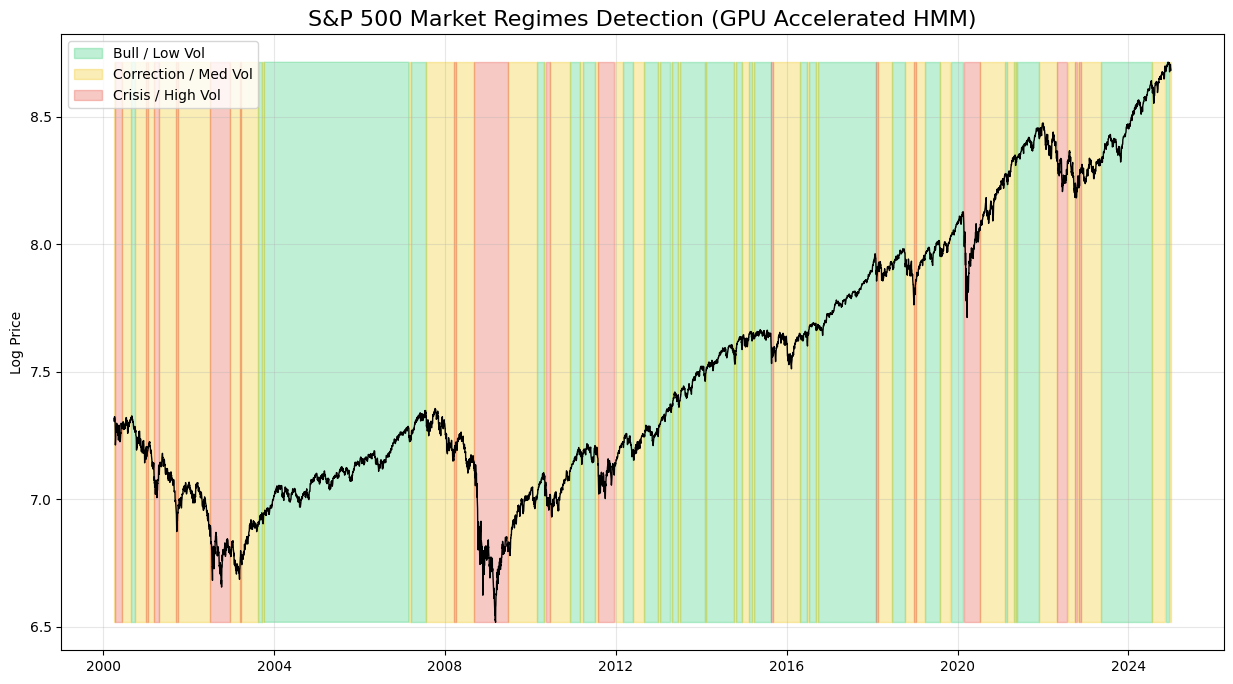

In [4]:
plot_regimes(df=df, states=states)

In [5]:
import numpy as np
import os

DATA_DIR = "../../data/finance"
RESULTS_DIR = "../../results/finance"
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

In [6]:
def write_bin(filename, array):
    with open(filename, 'wb') as f:
        f.write(array.astype(np.float32).tobytes())

def export_to_bin(X, filename):
    # Format binaire simple (Row-Major float32)
    write_bin(filename, X)
    
    # Fichier dims
    base = os.path.splitext(filename)[0]
    with open(f"{base}_dims.txt", 'w') as f:
        f.write(f"{X.shape[0]} {3} {X.shape[1]}") # T N K (N=3 états par défaut)

bin_path = f"{DATA_DIR}/sp500_obs.bin"
export_to_bin(X, bin_path)

In [7]:
states_cpu = np.fromfile("../../results/finance/sp500_path_cpu.bin", dtype=np.int32)

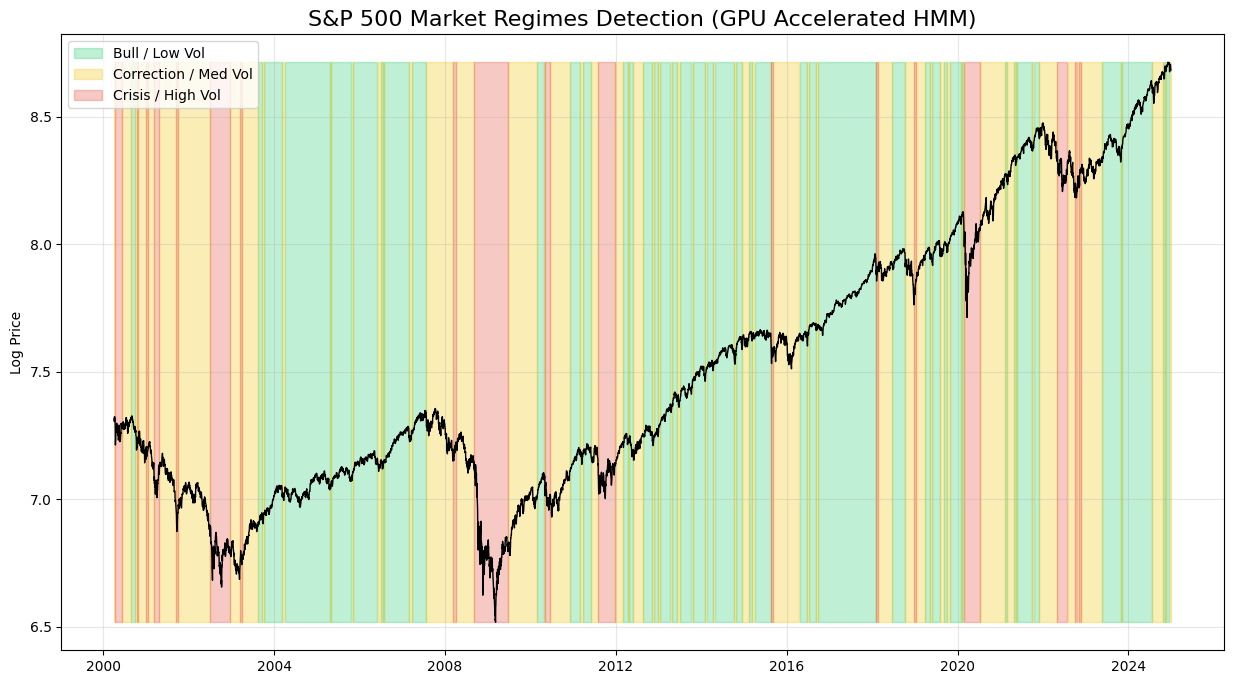

In [8]:
plot_regimes(df=df, states=states_cpu)

In [9]:
states_gpu = np.fromfile("../../results/finance/gpu_states.bin", dtype=np.int32)

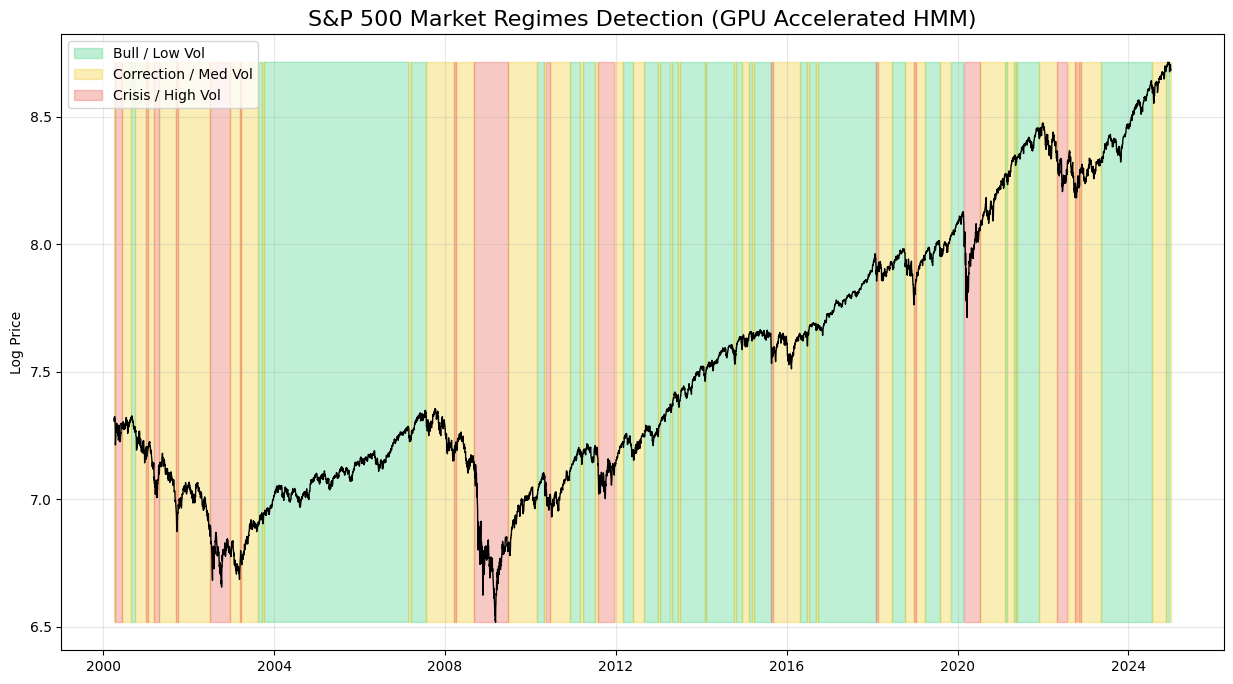

In [10]:
plot_regimes(df=df, states=states_gpu)